In [5]:
import os
import pandas as pd # pandas helps with reading tabular data(with panda you can read whole bunch of other file types, not only with tabular data)
import tensorflow as tf # deep learning framework, that uses keras
import numpy as np

In [6]:
#usng the pd.read_csv to read tabuler files(like csv, exel and more)
df = pd.read_csv(
    #the path to the data
    os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [7]:
print(df.head())

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [8]:
print(df.tail())
print(df.iloc[0])

                      id                                       comment_text  \
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  
id                                                0000997932d777bf
comment_text     Explanation\nWhy the 

In [9]:
#getting textVectorization layer - it help with tokenazation - it takes a work adn converts it to a number
from tensorflow.keras.layers import TextVectorization

In [10]:
print(TextVectorization??)

SyntaxError: invalid syntax (1593251299.py, line 1)

In [11]:
#splitting the data: X is comment and y is fetures
X = df['comment_text']
# df.colums[2:] - grabbs everything after the 2 first collums
# df[df.columns[2:]].values grabbes only the values from the coolums and now you have a vector for every comment Example:[0,0,1,0,1,0]
y = df[df.columns[2:]].values
print(X)
print(y)

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [12]:
# specifiying how many works you want to store in the vocabulary
# more works = bigger model
MAX_FEATURES = 200000 # number of words in the vocab

In [13]:
# initualizing the text vectorization layer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               # each sentance from the vocab will cap at 1800 words
                               output_sequence_length=1800,
                               #mapping words to int values
                               output_mode='int')

In [14]:
# teach the vectorizer our vocabulary
vectorizer.adapt(X.values)

In [15]:
print(vectorizer('hello world I'))
#the word "hello" is 286; "world" is 261

tf.Tensor([286 261   8 ...   0   0   0], shape=(1800,), dtype=int64)


In [16]:
# passing our values trough the vectorizer and declaring variable verctorized_text, with is your dataset
vectorized_text = vectorizer(X.values)
# now all the sentances from the train.csv file are vectorized

In [32]:
print(vectorized_text)
#shape=(159571,1800) means: there are 159571 example and 1800 maximum number of words

tf.Tensor(
[[  643    76     2 ...     0     0     0]
 [    1    54  2506 ...     0     0     0]
 [  425   440    70 ...     0     0     0]
 ...
 [32141  7329   383 ...     0     0     0]
 [    5    12   533 ...     0     0     0]
 [    5     8   130 ...     0     0     0]], shape=(159571, 1800), dtype=int64)


In [33]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices or list_file(MCSHBAP is the basic data pipeline generation set)
# creating the detaset
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
# applying cache to the dataset(Caching is particularly useful when you have the available memory or disk space to store the entire dataset.
# It can significantly speed up training because it reduces the time spent on data loading.)
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks
# each batch has 16 sentances- tokenized and with data for there toxicity

In [34]:
# printing 1 batch
print(dataset.as_numpy_iterator().next())

(array([[    24,    397,   3297, ...,      0,      0,      0],
       [    46,    291, 191318, ...,      0,      0,      0],
       [   409,  19735,   2287, ...,      0,      0,      0],
       ...,
       [    20,      7,    130, ...,      0,      0,      0],
       [  1004,   6975,   1271, ...,      0,      0,      0],
       [   252,     22, 132655, ...,      0,      0,      0]], dtype=int64), array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64))


In [36]:
# train =  70% of the dataset
train = dataset.take(int(len(dataset)*.7))
# val =  20% of the dataset
#first skipping the 70% that you take and assingt to train and getting the next 20% of dataset
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
# test =  10% of the dataset
#first skipping the 90% that you take and assingt to train and val and getting the last 10% of dataset
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [37]:
#the first layer inthe model is embedding layer - during the training it leans witch word are positive, witch are negative and witch are subjective

In [38]:
#  It represents a simple way to build a neural network by adding one layer at a time, where each layer has connections only to the previous and the next layer.
#  This model is called "Sequential" because it allows the creation of models layer-by-layer in a step-by-step fashion.
from tensorflow.keras.models import Sequential #getting the sequential model
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [43]:
# making instance of the sequential API
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer(it has 32 LSTM units and tanh activation)
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers(respective with 128,256 and 128 units and relu activation)
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer.It maps to the number of outputs that you have inside of the neural network(there are 6 numbers in the vector[0,0,0,0,0,0])
# By having 6 units in the final Dense layer you are able to output the 6 values for the vector
# it uses sigmoid activation to transorm values from the second to last layer in values between 0 and 1
model.add(Dense(6, activation='sigmoid'))

In [44]:
Bidirectional??
Dense??

Init signature: Dense(*args, **kwargs)
Source:        
class Dense(Layer):
  """Just your regular densely-connected NN layer.

  `Dense` implements the operation:
  `output = activation(dot(input, kernel) + bias)`
  where `activation` is the element-wise activation function
  passed as the `activation` argument, `kernel` is a weights matrix
  created by the layer, and `bias` is a bias vector created by the layer
  (only applicable if `use_bias` is `True`). These are all attributes of
  `Dense`.

  Note: If the input to the layer has a rank greater than 2, then `Dense`
  computes the dot product between the `inputs` and the `kernel` along the
  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
  For example, if input has dimensions `(batch_size, d0, d1)`,
  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
  along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
  (there are `batch_size * d0` such sub-tensors).
  The

In [45]:
#NEED TO READ MORE ABOUT IT AND HOW IT WORKS
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [48]:
#Training
history = model.fit(train, epochs=4, validation_data=val)

Epoch 1/4
6981/6981 [==============================] - 900s 129ms/step - loss: 0.0601 - val_loss: 0.0465
Epoch 2/4
6981/6981 [==============================] - 896s 128ms/step - loss: 0.0455 - val_loss: 0.0409
Epoch 3/4
6981/6981 [==============================] - 896s 128ms/step - loss: 0.0406 - val_loss: 0.0346
Epoch 4/4
6981/6981 [==============================] - 899s 129ms/step - loss: 0.0359 - val_loss: 0.0318


In [49]:
from matplotlib import pyplot as plt

In [50]:
history.history

{'loss': [0.06013515591621399,
  0.04552491381764412,
  0.040615882724523544,
  0.03592606633901596],
 'val_loss': [0.046536292880773544,
  0.04094148054718971,
  0.03463160619139671,
  0.031831901520490646]}

<Figure size 800x500 with 0 Axes>

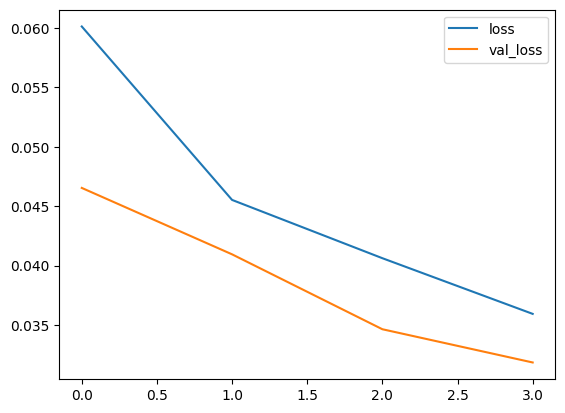

In [51]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [52]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [54]:
batch = test.as_numpy_iterator().next()

In [55]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [56]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [57]:
res = model.predict(np.expand_dims(input_text,0))

In [59]:
print(res.shape)

(1, 6)


In [60]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [62]:
#loop trought every single batch in the pipeline
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    # .flatten makes the predictions and the true values into 1 big array
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [63]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8915254473686218, Recall:0.7696810364723206, Accuracy:0.5195586681365967


  Attempting uninstall: gradio-client
    Found existing installation: gradio-client 0.8.0
    Uninstalling gradio-client-0.8.0:
      Successfully uninstalled gradio-client-0.8.0
  Attempting uninstall: gradio
    Found existing installation: gradio 4.12.0
    Uninstalling gradio-4.12.0:
      Successfully uninstalled gradio-4.12.0
  Attempting uninstall: anyio
    Found existing installation: anyio 4.2.0
    Uninstalling anyio-4.2.0:
      Successfully uninstalled anyio-4.2.0


You should consider upgrading via the 'c:\users\user\desktop\commenttoxicity\commenttoxicity\scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
import gradio as gr
import tensorflow as tf

In [2]:
model.save('toxicity.h5')

NameError: name 'model' is not defined

In [17]:
model = tf.keras.models.load_model('toxicity.h5')

In [18]:
input_str = vectorizer('You are a stupid moron and fucking idoit.  ')

In [19]:
res = model.predict(np.expand_dims(input_str,0))

In [20]:
res

array([[0.99988616, 0.514388  , 0.9966949 , 0.01986184, 0.95284194,
        0.10168611]], dtype=float32)

In [21]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [22]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

C:\Users\User\Desktop\commentToxicity\commentToxicity\lib\site-packages\gradio\inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\User\Desktop\commentToxicity\commentToxicity\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\User\Desktop\commentToxicity\commentToxicity\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\User\Desktop\commentToxicity\commentToxicity\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.5, however version 3.14.0 is available, please upgrade.
--------


In [23]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
*** Failed to connect to ec2.gradio.app:22: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


AttributeError: 'tuple' object has no attribute 'tb_frame'